In [1]:
from run_any_data import *

## Loading the data files

#### NOTE: to use the fitting function you need to provide the uncertainty for both x- and y-data (e.g. energy and flux).  For the uncertainty you can use for example 10% of the x and y data.
<br> provide the path to the file. The file can be in either txt or csv format. If the data is in xlsx format use pd.read_excel() instead of pd.read_csv()


In [2]:
#path_to_file = r'C:/Users/Omistaja/Desktop/SRL/2021SRL/messenger/event1.txt'
path =  r'/home/annafed/Documents/Fits_Lengying/Re _Spectral_index_study_error/PSP_LET_A_EnergySpectrum_withUncertainty.txt'
data = pd.read_csv(path) # or pd.read_excel() for xlsx data

path2 =  r'/home/annafed/Documents/Fits_Lengying/Re _Spectral_index_study_error/PSP_HET_A_EnergySpectrum_withUncertainty.txt'
data2 = pd.read_csv(path2) # or pd.read_excel() for xlsx data



#### Choose what to fit. The file can contain all kinds of data and multiple columns etc. Below, you need to choose what you want to fit. Choose x-axis data and y-axis data. 

In [3]:
x_data = data['PSP/LET-A - Energy (MeV)'][:len(data)-2]
y_data = data['flux at 1-hour after shock'][:len(data)-2]
#x_err = data['name of column with x uncertainty data'] 
#y_err = data['name of column with y uncertainty data']

# if the data doesn't contain uncertainty it still needs to be provided for the fitting functions to works
# e.g. use 10% of the data 
x_err = data['PSP/LET-A - Energy: Delta Minus (MeV)'][:len(data)-2]
y_err = data['flux uncertainty at 1-hour after shock'][:len(data)-2]


In [4]:
x_data2 = data2['PSP/HET-A - Energy (MeV)']
y_data2 = data2['flux at 1-hour after shock']
#x_err = data['name of column with x uncertainty data'] 
#y_err = data['name of column with y uncertainty data']

# if the data doesn't contain uncertainty it still needs to be provided for the fitting functions to works
# e.g. use 10% of the data 
x_err2 = data2['PSP/LET-A - Energy: Delta Minus (MeV)']
y_err2 = data2['flux uncertainty at 1-hour after shock']


## Saving data 
#### You can choose to save the plot (savefig), the ODR run as a pickle file (save_pickle) and save all the variables from the fitting procedure (save_fit_variables) by setting the options below to True

In [5]:
savefig = False # save the fit
save_pickle = False # save a pickle file of the odr run
save_fit_variables = False # save the variables from the fit

In [6]:
data_for_the_fit = pd.DataFrame()
data_for_the_fit['x'] = x_data
data_for_the_fit['y'] = y_data
data_for_the_fit['x_err'] = x_err
data_for_the_fit['y_err'] = y_err

In [7]:
data_for_the_fit2 = pd.DataFrame()
data_for_the_fit2['x'] = x_data2
data_for_the_fit2['y'] = y_data2
data_for_the_fit2['x_err'] = x_err2
data_for_the_fit2['y_err'] = y_err2

In [8]:
plot_title = 'PSP spectrum - 1-hours after shock'
x_label = 'Energy (MeV)'
y_label = 'Flux\n/(s cm² sr MeV)'
legend_title = '' 

## INPUTS FOR THE FIT

### which_fit options: 
<br>'single' will force a single pl fit to the data
<br> 'broken' will force a broken pl fit to the data but ONLY if the break point is within the energy range otherwise a sigle pl fit will be produced instead
<br> 'best_sb' will choose automatically the best fit type between single and broken by comparing the redchis of the fits
<br> 'cut' will produce a single pl fit with an exponential cutoff point. If the cutoff point is outside of the energy range a broken or single pl will be fit instead
<br> 'broken_cut' will produce a broken pl fit with an exponential cutoff point. If the cutoff point is outside of the energy range a broken or single pl will be fit instead
<br> 'best_cb' will choose the better option between a broken pl and a single+cutoff. If the break and cutoff points are outside of the energy range a single pl will be fit instead.
<br>'triple' will try to fit a triple pl. If not possible, will try to fit the next best option.
<br> 'best' will choose automatically the best fit type by comparing the redchis of the fits


In [9]:
which_fit = 'best' 

## Guess values and energy range
#### NOTE: e_min, e_max, break_guess and cut_guess should bein MeV. e_min and e_max can also be None. In this case the MAKE_THE_FIT function will automaically choose the values. (energy on x-axis)

<br>Random and iterations
<br>if use_random = False the fit will only be made once with the guess values
<br> if use_random = True the fitting function will first create a list of reasonable values for each of the fitting parameters then randomly select values from the lists and compare the redchis of each fit to find the best one
<br> iterations = number of times the fit is retried to find the best one

In [10]:
e_min =  None # in MeV 
e_max = None# in MeV

g1_guess = -1.9 # gamma 1 -> spectral index before the break (or single pl)
g2_guess = 1 # gamma 2 -> spectral index after the break (for broken pl)
g3_guess = -4.5 # gamma 3 -> spectral index after the second break (for triple pl)
c1_guess = 1e3 # peak flux
alpha_guess = -0.5 # sharpness of the first break
beta_guess = 1 #sharpness of the second break
break_guess_low = 2 #in MeV
break_guess_high = 10
cut_guess = 10 #in MeV

#legend_details = False

use_random = True 
iterations = 20

plot_title = 'BepiColombo spectrum - at shock arrival'
x_label = 'Energy (MeV)'
y_label = 'Flux\n/(s cm² sr MeV)'
legend_title = '' 


In [11]:
data_list = [data_for_the_fit, data_for_the_fit2]
for i in range(len(data_list)):
    print(i)

0
1


            x             y   x error    y error
0    2.181017  2.198708e+03  0.197399  29.593740
1    2.593681  1.568942e+03  0.234748  22.912300
2    3.084424  9.098809e+02  0.279164  15.987510
3    3.668019  5.930609e+02  0.331984  11.849430
4    4.362035  4.128909e+02  0.394798   9.061989
5    5.187363  2.897749e+02  0.469496   6.962877
6    6.168849  2.078389e+02  0.558329   5.408022
7    7.336039  1.531315e+02  0.663968   4.259277
8    8.724070  1.194532e+02  0.789596   3.507861
9   10.374730  1.036747e+02  0.938993   3.290381
10  12.337700  7.273753e+01  1.116657   2.537483
11  14.672080  5.435742e+01  1.327937   2.011988
12  17.448140  3.327129e+01  1.579191   1.443858
13  20.749450  2.408592e+01  1.877986   1.126696
14  24.675390  1.396498e+01  2.233314   0.796267
15  29.344150  8.677985e+00  2.655873   0.720073
16  12.337700  8.160597e+01  1.116657   0.881804
17  14.672080  4.665382e+01  1.327937   0.622846
18  17.448140  2.654394e+01  1.579191   0.447985
19  20.749450  1.892

/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:78: RuntimeWarning: overflow encountered in power
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break_low**alpha)/(0.1**alpha+E_break_low**alpha))**((gamma2-gamma1)/alpha)* ((x**beta + E_break_high**beta)/(0.1**beta+E_break_high**beta))**((gamma3-gamma2)/beta)
/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:78: RuntimeWarning: invalid value encountered in double_scalars
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break_low**alpha)/(0.1**alpha+E_break_low**alpha))**((gamma2-gamma1)/alpha)* ((x**beta + E_break_high**beta)/(0.1**beta+E_break_high**beta))**((gamma3-gamma2)/beta)
/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:78: RuntimeWarning: overflow encountered in double_scalars
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break_low**alpha)/(0.1**alpha+E_break_low**alpha))**((gamma2-gamma1)/alpha)* ((x**beta + E_break_high**beta)/(0.1**beta+E_bre

broken


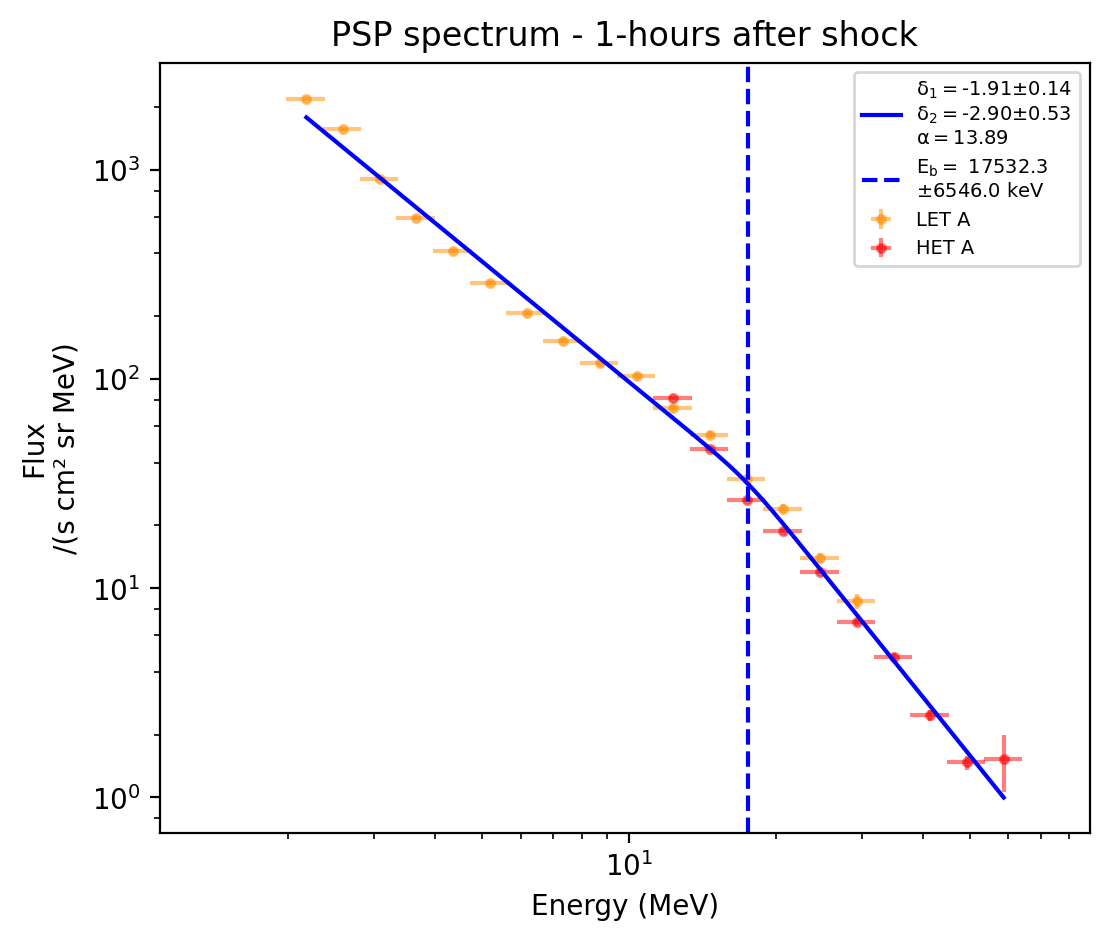

In [13]:
run_all(path, data_list, savefig = True, plot_title = plot_title, x_label = x_label, y_label = y_label, legend_title = legend_title, data_label_for_legend = ['LET A', 'HET A'], which_fit = 'triple', e_min = e_min, e_max = e_max)
